# Aula 1 Análisando uma Base de Dados

In [44]:
# importar biblioteca pandas e apelidar
import pandas as pd

In [45]:
# trazer e ler base de dados de acordo com seu formato
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [46]:
# exibir dados caso não especifique numero de linhas será exibido as 5 primeiras
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [47]:
# exibir informações da base como numero de registros e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [48]:
# exibe dados númericos descrevendo algumas questões
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [49]:
# captura o tamanho da tabela (nº linhas, nº colunas)
# shape é um objeto, um vetor com dois valores
df.shape

(133349, 11)

In [50]:
linhas, colunas = df.shape[0], df.shape[1]

In [51]:
print("linhas: ", linhas)
print("colunas: ", colunas)

linhas:  133349
colunas:  11


In [52]:
# captura as colunas da tabela
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [53]:
# renomeando colunas para português do Brasil
renomear_colunas = {
    'work_year': 'ano_trabalho',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'tipo_emprego',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_salario',
    'salary_in_usd': 'salario_em_usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'taxa_remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'porte_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano_trabalho', 'nivel_experiencia', 'tipo_emprego', 'cargo', 'salario',
       'moeda_salario', 'salario_em_usd', 'residencia', 'taxa_remoto',
       'localizacao_empresa', 'porte_empresa'],
      dtype='object')

In [54]:
# Obtendo resultados da coluna
df['nivel_experiencia'].value_counts()

,count
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


In [55]:
df['tipo_emprego'].value_counts()

,count
tipo_emprego,
FT,132563
CT,394
PT,376
FL,16


In [56]:
df['taxa_remoto'].value_counts()

,count
taxa_remoto,
0,105312
100,27718
50,319


In [57]:
df['porte_empresa'].value_counts()

,count
porte_empresa,
M,129561
L,3574
S,214


In [58]:
nivel_experiencia = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['nivel_experiencia'] = df['nivel_experiencia'].replace(nivel_experiencia)
df['nivel_experiencia'].value_counts()

,count
nivel_experiencia,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [59]:
tipo_contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer',
    'CT': 'Contrato'
}

df['tipo_emprego'] = df['tipo_emprego'].replace(tipo_contrato)
df['tipo_emprego'].value_counts()

,count
tipo_emprego,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [60]:
porte_empresa = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

df['porte_empresa'] = df['porte_empresa'].replace(porte_empresa)
df['porte_empresa'].value_counts()

,count
porte_empresa,
Média,129561
Grande,3574
Pequena,214


In [61]:
taxa_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['taxa_remoto'] = df['taxa_remoto'].replace(taxa_remoto)
df['taxa_remoto'].value_counts()

,count
taxa_remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [62]:
df.head()

,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [63]:
df.describe(include='object')

,nivel_experiencia,tipo_emprego,cargo,moeda_salario,residencia,taxa_remoto,localizacao_empresa,porte_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [64]:
df.describe()

,ano_trabalho,salario,salario_em_usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Nova seção

# Aula 2 Tratando uma Base de Dados

In [65]:
# retorna quais campos da tabelas não possui dados
#       True  -> se o valor for nulo (NaN)
#       False -> se o valor NÃO for nulo

df.isnull()


,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [66]:
# soma os campos da coluna que não possuem valores
df.isnull().sum()

,0
ano_trabalho,10
nivel_experiencia,0
tipo_emprego,0
cargo,0
salario,0
moeda_salario,0
salario_em_usd,0
residencia,0
taxa_remoto,0
localizacao_empresa,0


In [67]:
# retorna os valores únicos que a coluna possui
# nan = not a number (não é um número)
df['ano_trabalho'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [68]:
df[df.isnull().any(axis=1)]

# Filtra o DataFrame 'df' e retorna apenas as linhas
# que contêm pelo menos um valor nulo (NaN).

# O método .any(axis=1) verifica, para cada linha (axis=1 significa "por linha"),
# se existe pelo menos UM valor True (ou seja, pelo menos um valor nulo) nessa linha.


,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [69]:
'''
Em uma base de dados, é importante tratar valores nulos (NaN),
pois eles podem impactar negativamente a análise e a interpretação dos resultados.

Exemplo:
Se treinarmos um modelo de IA com muitos valores inexistentes,
ele pode acabar associando a ausência de dados (nulo) a um resultado incorreto.

Observação:
A ausência de dado (nulo) é diferente de um valor zero.
Por exemplo, um aluno tirar nota 0 em uma prova é diferente de não ter feito a prova.

Principais formas de tratamento:
- Preenchê-los com outro valor, seguindo uma regra ou método,
  como média, mediana, moda (valor mais comum), interpolação, entre outros.
- Excluir as linhas ou colunas que contêm valores nulos,
  dependendo do impacto dessa remoção na análise.

A seguir, serão apresentados exemplos de como preencher esses valores.
'''

'\nEm uma base de dados, é importante tratar valores nulos (NaN),\npois eles podem impactar negativamente a análise e a interpretação dos resultados.\n\nExemplo:\nSe treinarmos um modelo de IA com muitos valores inexistentes,\nele pode acabar associando a ausência de dados (nulo) a um resultado incorreto.\n\nObservação:\nA ausência de dado (nulo) é diferente de um valor zero.\nPor exemplo, um aluno tirar nota 0 em uma prova é diferente de não ter feito a prova.\n\nPrincipais formas de tratamento:\n- Preenchê-los com outro valor, seguindo uma regra ou método,\n  como média, mediana, moda (valor mais comum), interpolação, entre outros.\n- Excluir as linhas ou colunas que contêm valores nulos,\n  dependendo do impacto dessa remoção na análise.\n\nA seguir, serão apresentados exemplos de como preencher esses valores.\n'

In [70]:
# criando um mini dataframe de sálarios para preencher com a média e mediana dos valores que existem

import numpy as np

df_salarios = pd.DataFrame({
    'nome': ['Cesar', 'Ana', 'Bruno', 'Maria', 'Valéria'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

# df_salarios['salario_media'] - nova coluna que onde valores nulos serão preenchidos
# df_salarios['salario_mediana'] - nova coluna que onde valores nulos serão preenchidos
# fillna - preencher valores nulos com o valor do resultado metédo (média, mediana, etc.) dos valores da coluna especificada
# mean - média
# median - mediana
# round - arrendonda as casas decimais

df_salarios # exibir


,nome,salario,salario_media,salario_mediana
0,Cesar,4000.0,4000.00,4000.0
1,Ana,NaN,36333.33,5000.0
2,Bruno,5000.0,5000.00,5000.0
3,Maria,NaN,36333.33,5000.0
4,Valéria,100000.0,100000.00,100000.0


In [71]:
# criando um mini dataframe de temperaturas para preencher com valores anteriores

df_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['temperatura_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,temperatura_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [72]:
# criando um mini dataframe de temperaturas para preencher com valores posteriores

df_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['temperatura_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,temperatura_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [73]:
# criando um mini dataframe para preencher com valor fixo

df_cidades = pd.DataFrame({
    'nome': ['Cesar', 'Ana', 'Bruno', 'Maria', 'Valéria'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Curitiba',]
})

df_cidades['cidade_preenchida'] = df_cidades['nome'].fillna('Não Informado')
df_cidades


,nome,cidade,cidade_preenchida
0,Cesar,São Paulo,Cesar
1,Ana,NaN,Ana
2,Bruno,Curitiba,Bruno
3,Maria,NaN,Maria
4,Valéria,Curitiba,Valéria


In [74]:
'''
Agora que vimos formas de preencher valores nulos, a abordagem que você escolher
dependerá das características da sua base de dados.

No nosso caso, como a base é bem extensa e possui apenas 10 registros com
valores nulos, optamos por removê-los da análise.

Seguindo essa abordagem, é mais adequado criar uma cópia da base com esses
registros removidos, mantendo a base original intacta.
'''

'\nAgora que vimos formas de preencher valores nulos, a abordagem que você escolher\ndependerá das características da sua base de dados.\n\nNo nosso caso, como a base é bem extensa e possui apenas 10 registros com\nvalores nulos, optamos por removê-los da análise.\n\nSeguindo essa abordagem, é mais adequado criar uma cópia da base com esses\nregistros removidos, mantendo a base original intacta.\n'

In [75]:
# copiando a base sem os valores nulos
df_limpo = df.dropna()

In [76]:
df_limpo.isnull().sum()

,0
ano_trabalho,0
nivel_experiencia,0
tipo_emprego,0
cargo,0
salario,0
moeda_salario,0
salario_em_usd,0
residencia,0
taxa_remoto,0
localizacao_empresa,0


In [77]:
df_limpo.head()
# perceba que na nossa base os valores de ano_trabalho está com ponto decimal, não a vendo necessidade

,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [78]:
df_limpo.info()
# a coluna ano_trabalho está no tipo float64, sendo que ano são valores inteiros vamos ver como alterá-lo

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano_trabalho         133339 non-null  float64
 1   nivel_experiencia    133339 non-null  object 
 2   tipo_emprego         133339 non-null  object 
 3   cargo                133339 non-null  object 
 4   salario              133339 non-null  int64  
 5   moeda_salario        133339 non-null  object 
 6   salario_em_usd       133339 non-null  int64  
 7   residencia           133339 non-null  object 
 8   taxa_remoto          133339 non-null  object 
 9   localizacao_empresa  133339 non-null  object 
 10  porte_empresa        133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [79]:
# alterando o tipo de dado da coluna
df_limpo = df_limpo.assign(ano_trabalho=df_limpo['ano_trabalho'].astype('int64'))

In [80]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [81]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ano_trabalho         133339 non-null  int64 
 1   nivel_experiencia    133339 non-null  object
 2   tipo_emprego         133339 non-null  object
 3   cargo                133339 non-null  object
 4   salario              133339 non-null  int64 
 5   moeda_salario        133339 non-null  object
 6   salario_em_usd       133339 non-null  int64 
 7   residencia           133339 non-null  object
 8   taxa_remoto          133339 non-null  object
 9   localizacao_empresa  133339 non-null  object
 10  porte_empresa        133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula 3 Visualização de Dados
Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [82]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': ' Distribuição - Nível de Experiência'}, xlabel='nivel_experiencia'>

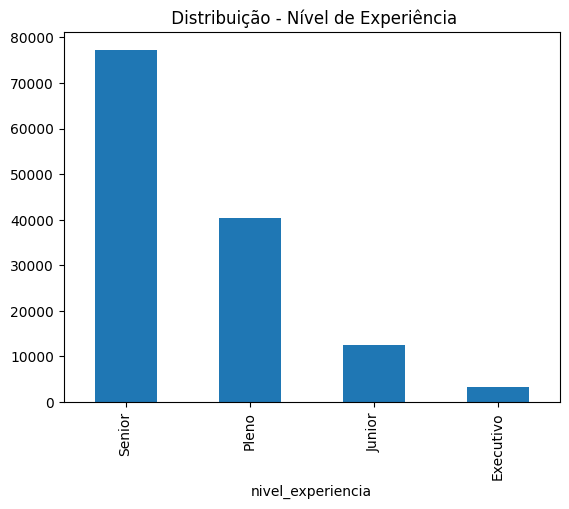

In [83]:
df_limpo['nivel_experiencia'].value_counts().plot(kind='bar', title=' Distribuição - Nível de Experiência')

# criando uma visualização gráfica com a frequencia dos dados
# df_limpo['nivel_experiencia'].value_counts() -> conta valores da coluna
# plot(kind='bar', title=' Distribuição - Nível de Experiência') -> cria vizualização desses valores em gráfico de barras


In [84]:
'''
Bibliotecas para elaborar um gráfico, "plotar": Matplotlib e Seaborn
'''

'\nBibliotecas para elaborar um gráfico, "plotar": Matplotlib e Seaborn\n'

In [85]:
# importando biblioteca
import seaborn as sns

<Axes: xlabel='nivel_experiencia', ylabel='salario_em_usd'>

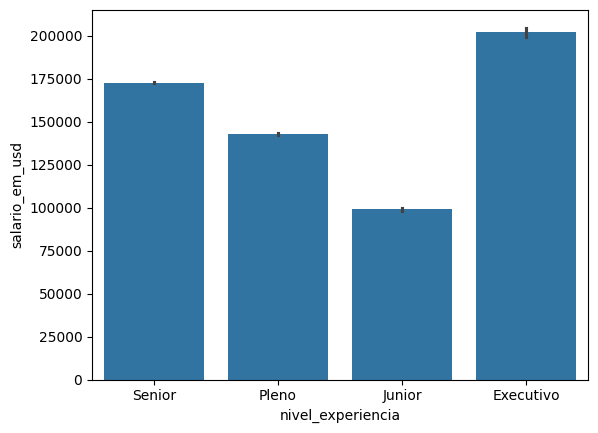

In [86]:
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd')

# criando uma visualização gráfica com a frequencia dos dados
# comparando sálarios em dolar com nível de experiencia
# -> cria vizualização desses valores em gráfico de barras

In [87]:
# Importando modulo da lib matplot
import matplotlib.pyplot as plt

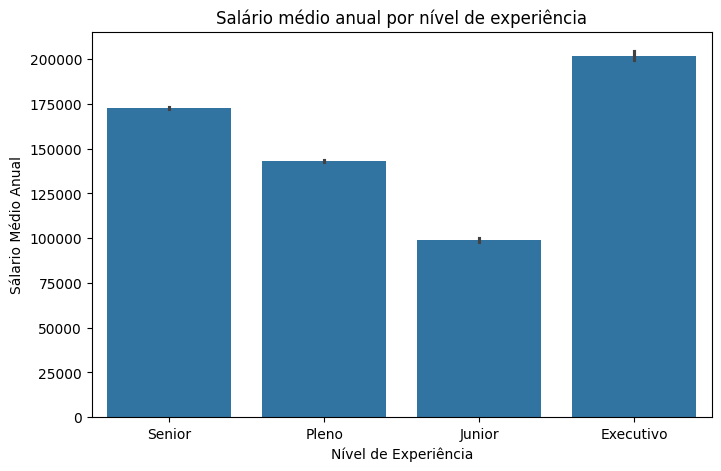

In [88]:
# Personalizando Gráfico com matplot

plt.figure(figsize=(8,5)) # definindo tamanho da figura
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd') # criando gráfico
plt.title('Salário médio anual por nível de experiência') # Inserindo título
plt.xlabel('Nível de Experiência') # label do eixo X
plt.ylabel('Sálario Médio Anual') # label do eixo Y

plt.show()

In [89]:
# agrupando e ordenando valores
df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=True)

,salario_em_usd
nivel_experiencia,
Junior,99034.963267
Pleno,143044.845979
Senior,172850.838301
Executivo,202027.667813


In [90]:
ordem = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=True).index

print(ordem)

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='nivel_experiencia')


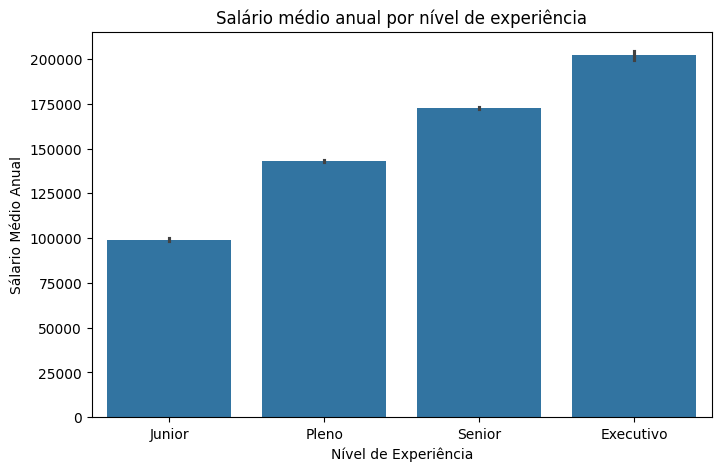

In [91]:
#Gráfico ordenado

plt.figure(figsize=(8,5)) # definindo tamanho da figura
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd', order=ordem) # criando gráfico
plt.title('Salário médio anual por nível de experiência') # Inserindo título
plt.xlabel('Nível de Experiência') # label do eixo X
plt.ylabel('Sálario Médio Anual') # label do eixo Y

plt.show()

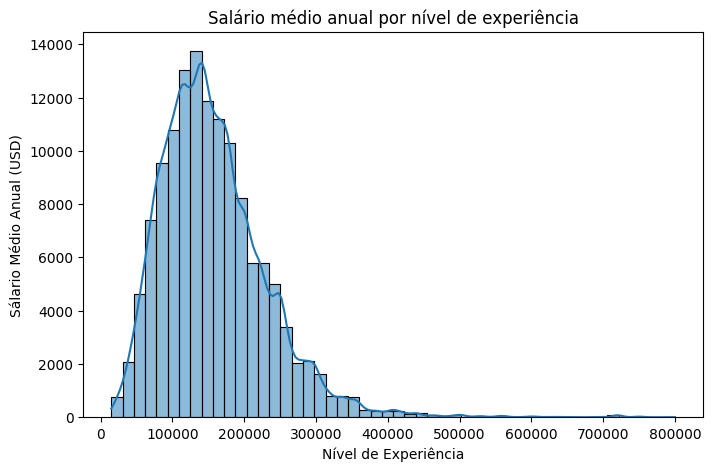

In [92]:
 #Criando um histograma

plt.figure(figsize=(8,5)) # definindo tamanho da figura
sns.histplot(df_limpo['salario_em_usd'], bins=50, kde=True) # criando Histograma
plt.title('Salário médio anual por nível de experiência') # Inserindo título
plt.xlabel('Nível de Experiência') # label do eixo X
plt.ylabel('Sálario Médio Anual (USD)') # label do eixo Y

plt.show()

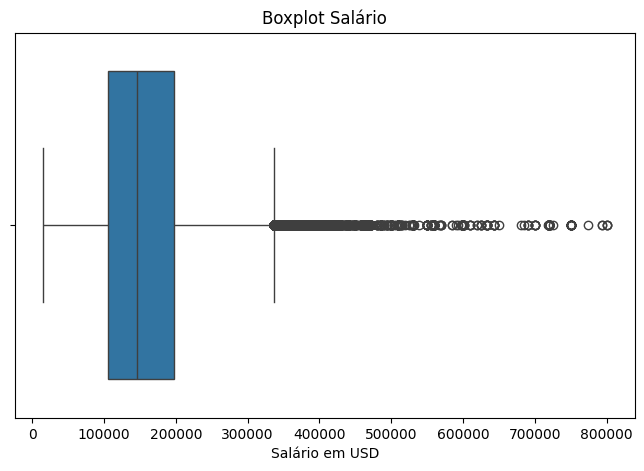

In [93]:
 plt.figure(figsize=(8,5))
 sns.boxplot(x=df_limpo['salario_em_usd'])
 plt.title('Boxplot Salário')
 plt.xlabel('Salário em USD')

 plt.show()

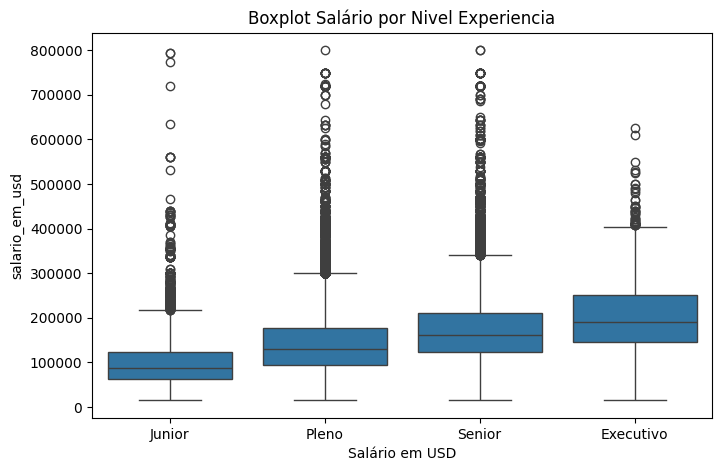

In [94]:
 ordem_nivel_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo' ]

 plt.figure(figsize=(8,5))
 sns.boxplot(x='nivel_experiencia', y='salario_em_usd', data=df_limpo, order=ordem_nivel_experiencia)
 plt.title('Boxplot Salário por Nivel Experiencia')
 plt.xlabel('Salário em USD')

 plt.show()

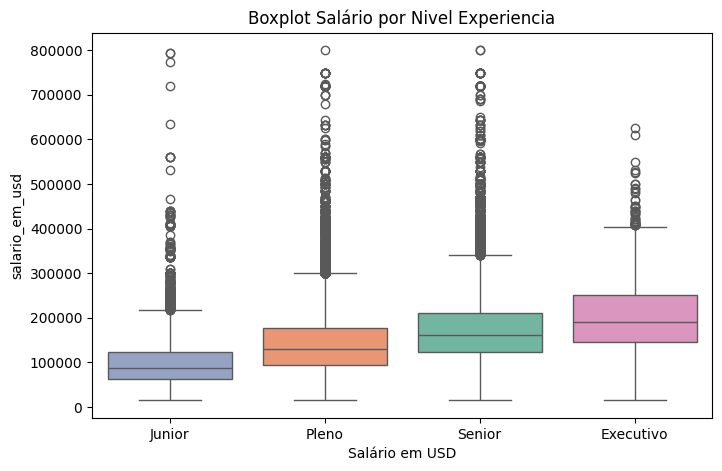

In [95]:
 ordem_nivel_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo' ]

 plt.figure(figsize=(8,5))
 sns.boxplot(x='nivel_experiencia', y='salario_em_usd', data=df_limpo, order=ordem_nivel_experiencia, palette='Set2', hue='nivel_experiencia')
 plt.title('Boxplot Salário por Nivel Experiencia')
 plt.xlabel('Salário em USD')

 plt.show()

In [96]:
# Biblioteca para gráficos interativos
import plotly.express as px

In [97]:
nivel_experiencia_media_salario = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False).reset_index( )

fig = px.bar(nivel_experiencia_media_salario,
             x='nivel_experiencia',
             y='salario_em_usd',
             title='Média Salarial por Senioridade',
             labels={'nivel_experiencia': 'Nível de Experiencia',
                     'salario_em_usd':  'Salário em dolar anual'
                    })
fig.show()

In [98]:
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção modelo de trabalho'
            )
fig.show()

In [99]:
remoto_contagem = df_limpo['taxa_remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção modelo de trabalho',
             hole=0.5 #buraco do gráfico

            )
fig.update_traces(textinfo='percent+label') # exibir porcentagem
fig.show()

In [100]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


# Desafio da aula 3
Crie um gráfico interativo com os salários de cientistas de dados por senioridade.

In [1]:
# Ordem personalizada
ordem_nivel_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo']

# Filtrar apenas Data Scientist
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

# Calcular a média salarial por nível de experiência
nivel_experiencia_media_salario = (
    df_data_scientist
    .groupby('nivel_experiencia')['salario_em_usd']
    .mean()
    .reindex(ordem_nivel_experiencia)  # garante a ordem mesmo se faltar categorias
    .dropna()  # remove níveis que não existam no filtro
    .reset_index()
)

# Criar o gráfico
fig = px.bar(
    nivel_experiencia_media_salario,
    x='nivel_experiencia',
    y='salario_em_usd',
    title='Média Salarial por Nível de Experiência (Data Scientist)',
    labels={
        'nivel_experiencia': 'Nível de Experiência',
        'salario_em_usd': 'Salário em dólar anual'
    }
)

fig.show()


NameError: name 'df_limpo' is not defined

dddddd

In [ ]:
ndncn,mzxmzxnc

# Aula 4 - Construindo um Dashboard com Streamlit

> Aprender a usar a biblioteca Streamlit para a criação de um dashboard interativo simples, que permite visualizar dados filtrados e gerar gráficos de forma prática.

https://dashboard-salarios-dados.streamlit.app/

1. Criar o ambiente virtual:

```bash
python3 -m venv .venv
```

2. Ativar o ambiente virtual em Windows:

```bash
.venv\Scripts\Activate
```

3. Ativar o ambiente virtual em MAC/LINUX:
```bash
source .venv/bin/activate
```

4. Criar um arquivo chamado requirements.txt e adicionar os pacotes necessários

```bash
pandas==2.2.3
streamlit==1.44.1
plotly==5.24.1
```

5. Instalar as bibliotecas necessárias

```bash
pip install -r requirements.txt
```

6. Criar a Interface do Dashboard com Streamlit

Para rodar localmente no Streamlit:

```bash
streamlit run nome_do_app.py
```

7. Realizar o deploy do Dashboard no Streamlit Cloud: https://streamlit.io/cloud.


```python
import streamlit as st
import pandas as pd
import plotly.express as px

# --- Configuração da Página ---
# Define o título da página, o ícone e o layout para ocupar a largura inteira.
st.set_page_config(
    page_title="Dashboard de Salários na Área de Dados",
    page_icon="📊",
    layout="wide",
)

# --- Carregamento dos dados ---
df = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")

# --- Barra Lateral (Filtros) ---
st.sidebar.header("🔍 Filtros")

# Filtro de Ano
anos_disponiveis = sorted(df['ano'].unique())
anos_selecionados = st.sidebar.multiselect("Ano", anos_disponiveis, default=anos_disponiveis)

# Filtro de Senioridade
senioridades_disponiveis = sorted(df['senioridade'].unique())
senioridades_selecionadas = st.sidebar.multiselect("Senioridade", senioridades_disponiveis, default=senioridades_disponiveis)

# Filtro por Tipo de Contrato
contratos_disponiveis = sorted(df['contrato'].unique())
contratos_selecionados = st.sidebar.multiselect("Tipo de Contrato", contratos_disponiveis, default=contratos_disponiveis)

# Filtro por Tamanho da Empresa
tamanhos_disponiveis = sorted(df['tamanho_empresa'].unique())
tamanhos_selecionados = st.sidebar.multiselect("Tamanho da Empresa", tamanhos_disponiveis, default=tamanhos_disponiveis)

# --- Filtragem do DataFrame ---
# O dataframe principal é filtrado com base nas seleções feitas na barra lateral.
df_filtrado = df[
    (df['ano'].isin(anos_selecionados)) &
    (df['senioridade'].isin(senioridades_selecionadas)) &
    (df['contrato'].isin(contratos_selecionados)) &
    (df['tamanho_empresa'].isin(tamanhos_selecionados))
]

# --- Conteúdo Principal ---
st.title("🎲 Dashboard de Análise de Salários na Área de Dados")
st.markdown("Explore os dados salariais na área de dados nos últimos anos. Utilize os filtros à esquerda para refinar sua análise.")

# --- Métricas Principais (KPIs) ---
st.subheader("Métricas gerais (Salário anual em USD)")

if not df_filtrado.empty:
    salario_medio = df_filtrado['usd'].mean()
    salario_maximo = df_filtrado['usd'].max()
    total_registros = df_filtrado.shape[0]
    cargo_mais_frequente = df_filtrado["cargo"].mode()[0]
else:
    salario_medio, salario_mediano, salario_maximo, total_registros, cargo_mais_comum = 0, 0, 0, ""

col1, col2, col3, col4 = st.columns(4)
col1.metric("Salário médio", f"${salario_medio:,.0f}")
col2.metric("Salário máximo", f"${salario_maximo:,.0f}")
col3.metric("Total de registros", f"{total_registros:,}")
col4.metric("Cargo mais frequente", cargo_mais_frequente)

st.markdown("---")

# --- Análises Visuais com Plotly ---
st.subheader("Gráficos")

col_graf1, col_graf2 = st.columns(2)

with col_graf1:
    if not df_filtrado.empty:
        top_cargos = df_filtrado.groupby('cargo')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
        grafico_cargos = px.bar(
            top_cargos,
            x='usd',
            y='cargo',
            orientation='h',
            title="Top 10 cargos por salário médio",
            labels={'usd': 'Média salarial anual (USD)', 'cargo': ''}
        )
        grafico_cargos.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
        st.plotly_chart(grafico_cargos, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de cargos.")

with col_graf2:
    if not df_filtrado.empty:
        grafico_hist = px.histogram(
            df_filtrado,
            x='usd',
            nbins=30,
            title="Distribuição de salários anuais",
            labels={'usd': 'Faixa salarial (USD)', 'count': ''}
        )
        grafico_hist.update_layout(title_x=0.1)
        st.plotly_chart(grafico_hist, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de distribuição.")

col_graf3, col_graf4 = st.columns(2)

with col_graf3:
    if not df_filtrado.empty:
        remoto_contagem = df_filtrado['remoto'].value_counts().reset_index()
        remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
        grafico_remoto = px.pie(
            remoto_contagem,
            names='tipo_trabalho',
            values='quantidade',
            title='Proporção dos tipos de trabalho',
            hole=0.5
        )
        grafico_remoto.update_traces(textinfo='percent+label')
        grafico_remoto.update_layout(title_x=0.1)
        st.plotly_chart(grafico_remoto, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico dos tipos de trabalho.")

with col_graf4:
    if not df_filtrado.empty:
        df_ds = df_filtrado[df_filtrado['cargo'] == 'Data Scientist']
        media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()
        grafico_paises = px.choropleth(media_ds_pais,
            locations='residencia_iso3',
            color='usd',
            color_continuous_scale='rdylgn',
            title='Salário médio de Cientista de Dados por país',
            labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})
        grafico_paises.update_layout(title_x=0.1)
        st.plotly_chart(grafico_paises, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de países.")

# --- Tabela de Dados Detalhados ---
st.subheader("Dados Detalhados")
st.dataframe(df_filtrado)
```


# Aula 4 Extra - Explicando Desafio da Aula 3 (Gráfico 4 do projeto)

> Diferença de média salarial entre Cientistas de Dados (Data Scientist) por país

In [101]:
# instalando biblioteca para converter siglas ISO 2 para ISO 3
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.2 MB/s eta 0:00:00


In [102]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [104]:
# Importando biblioteca para criação de mapas
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except AttributeError:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salario_em_usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='salario_em_usd',
                    color_continuous_scale='rdylgn', # paleta de cores
                    title='Salário médio de Cientista de Dados por país',
                    labels={'salario_em_usd': 'Salário médio (USD)', 'residencia_iso3': 'País' }
                    )
fig.show()

In [105]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,tipo_emprego,cargo,salario,moeda_salario,salario_em_usd,residencia,taxa_remoto,localizacao_empresa,porte_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [106]:
# Salvar base de dados em CSV
df_limpo.to_csv('dados-imersao-python-final.csv')